In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [4]:
df=df.drop(columns=['Seat No.'],axis=1)
df.shape

(571, 42)

In [5]:
df.drop_duplicates()
df.shape

(571, 42)

In [6]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
null_rows=df[df.isnull().any(axis=1)]
null_counts = null_rows.isnull().sum(axis=1)
null_counts

44     36
60     24
86      7
91     19
137    30
       ..
423     1
424     1
481     9
543     5
565    35
Length: 154, dtype: int64

In [9]:
row_null=df.isnull().sum(axis=1)
row_null

0      0
1      0
2      0
3      0
4      0
      ..
566    0
567    0
568    0
569    0
570    0
Length: 571, dtype: int64

In [10]:
rows_to_drop = row_null[row_null > 33].index
df.drop(rows_to_drop, inplace=True)

In [11]:
X=df.drop('CGPA',axis=1) ##separate features and labels
y=df['CGPA']

In [12]:
def fillna_with_modes(row):
    modes = row.mode()
    if len(modes) > 0:
        return row.fillna(modes[0])
    else:
        return row

X = X.apply(fillna_with_modes, axis=1)
X

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [13]:
X[X.isnull().any(axis=1)]

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412


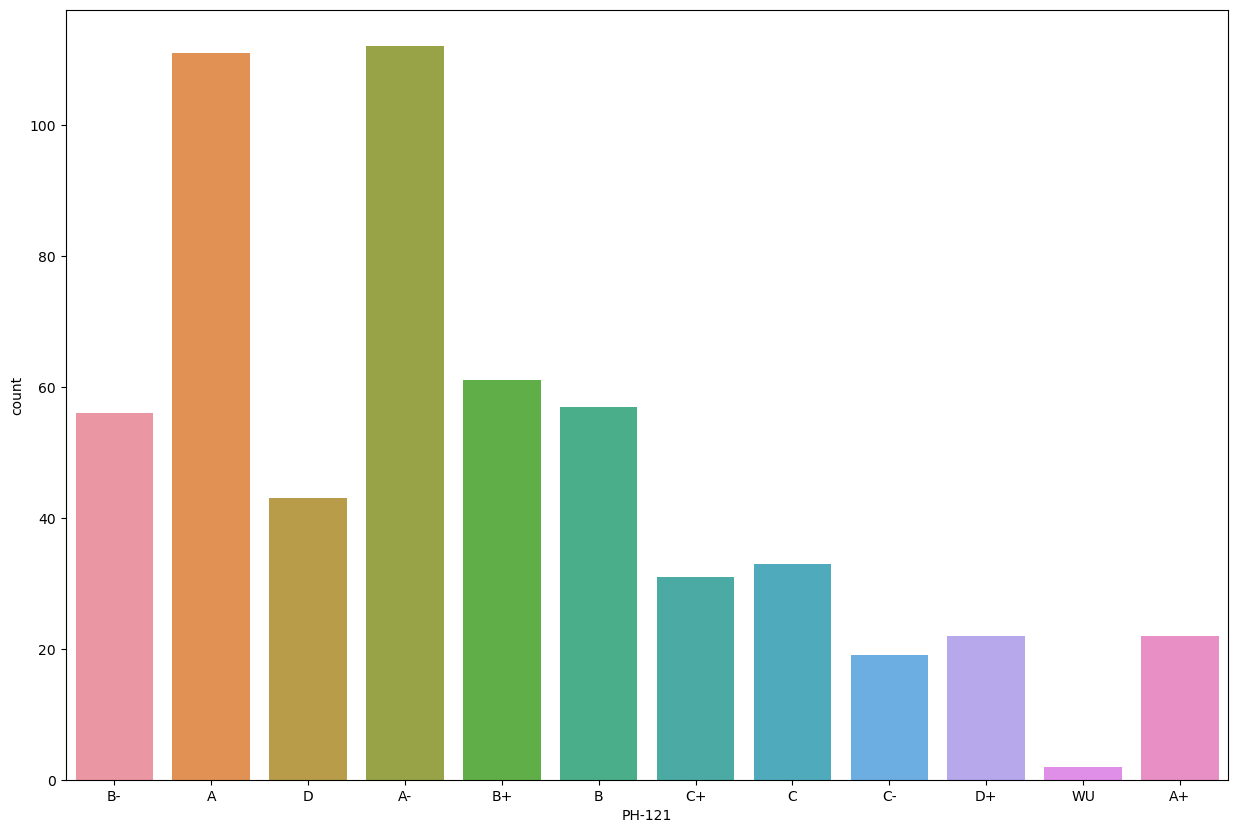

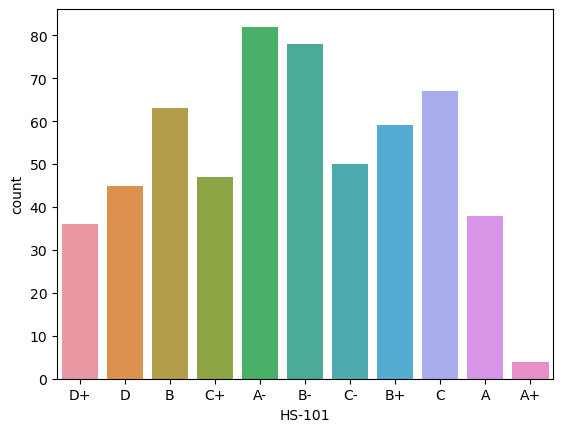

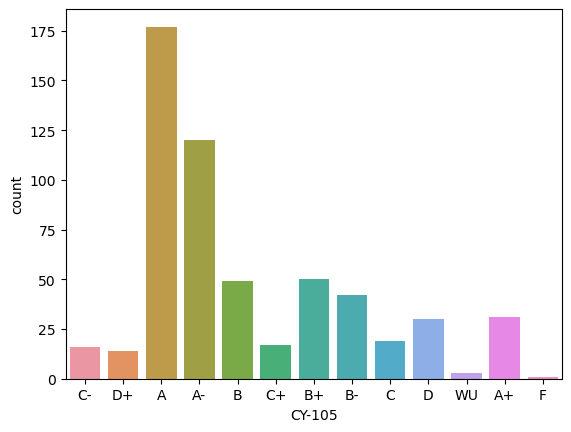

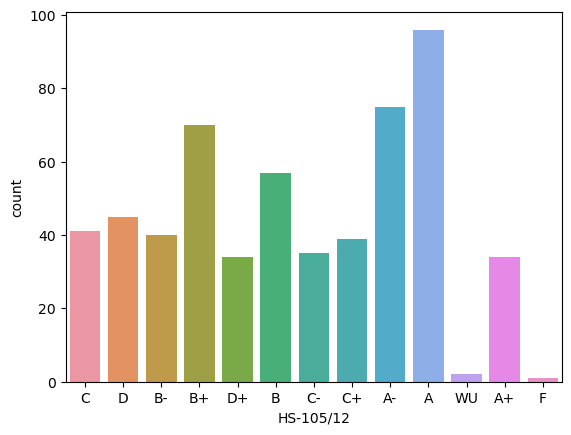

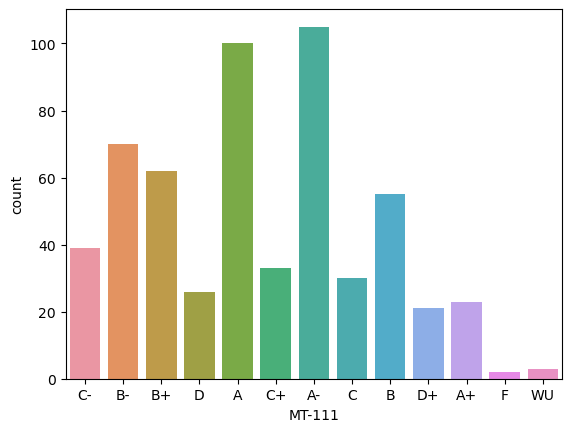

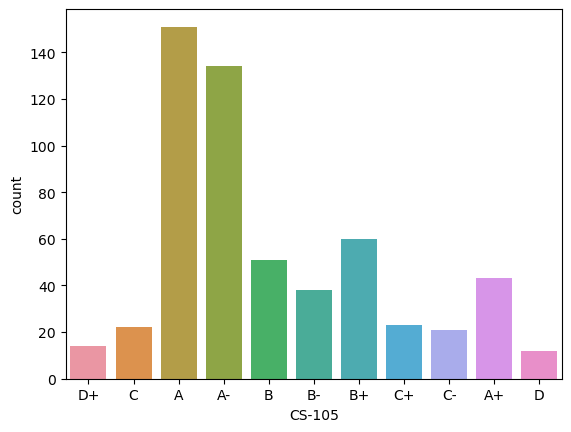

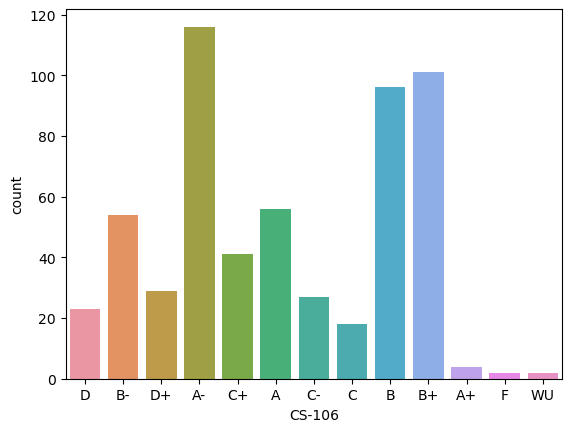

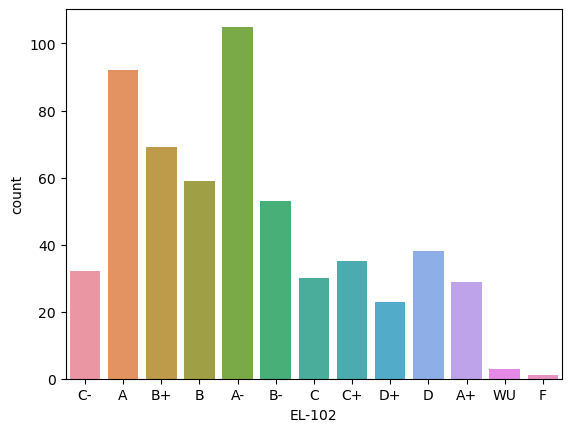

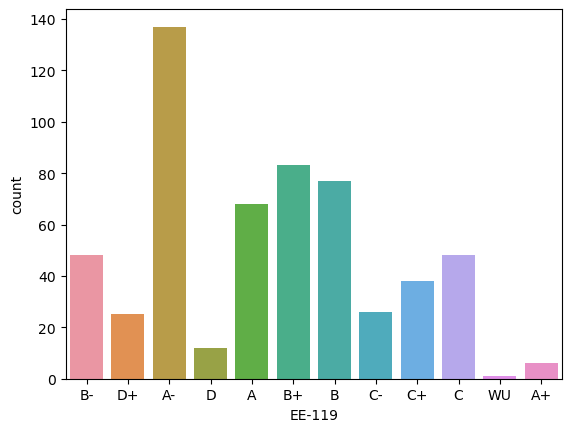

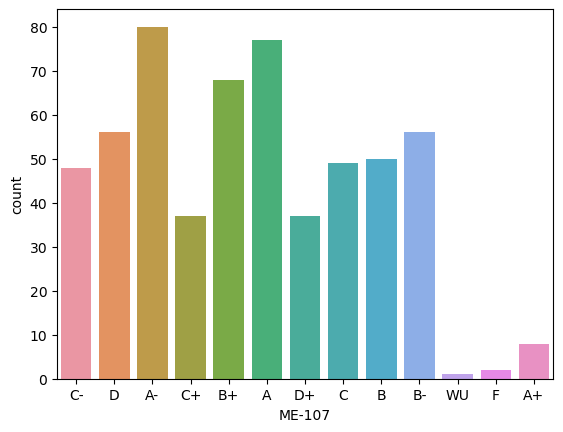

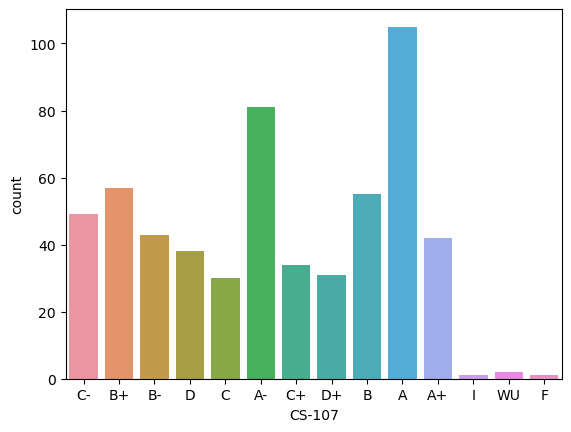

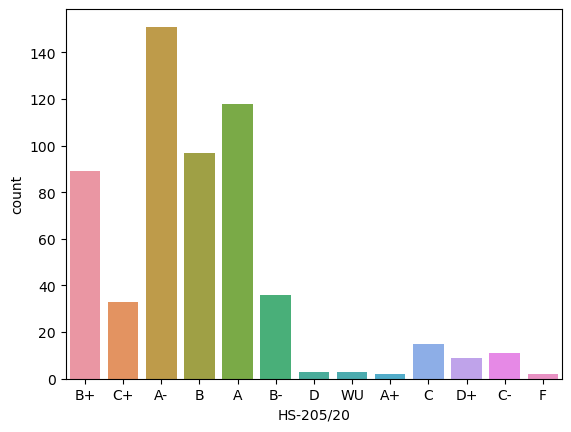

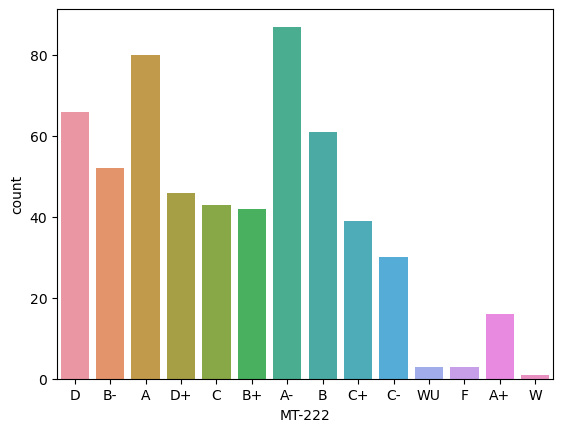

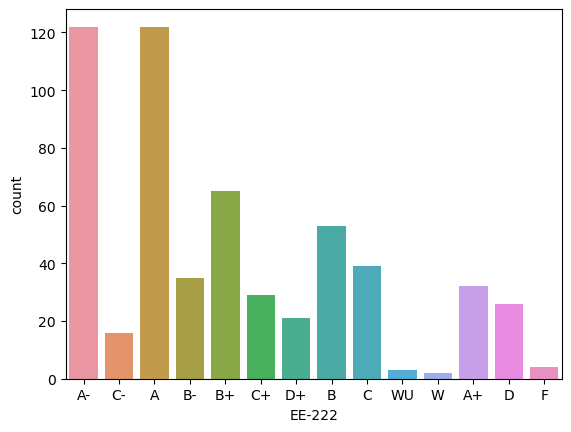

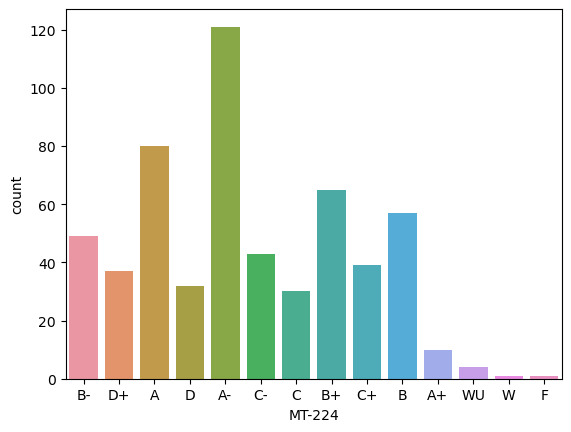

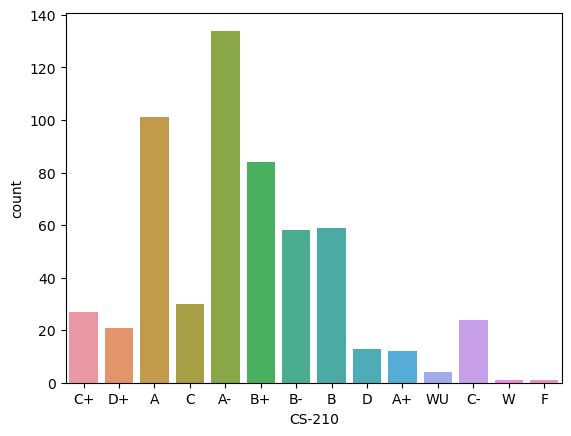

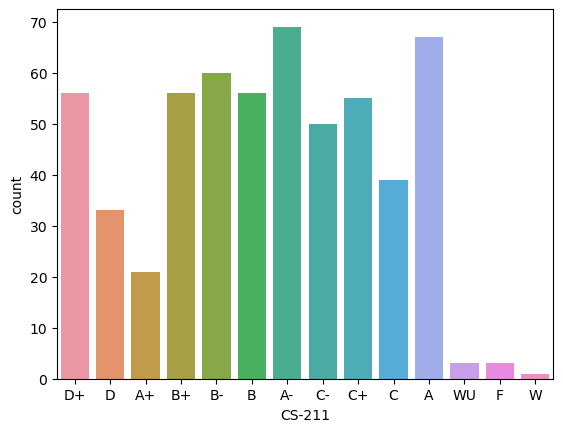

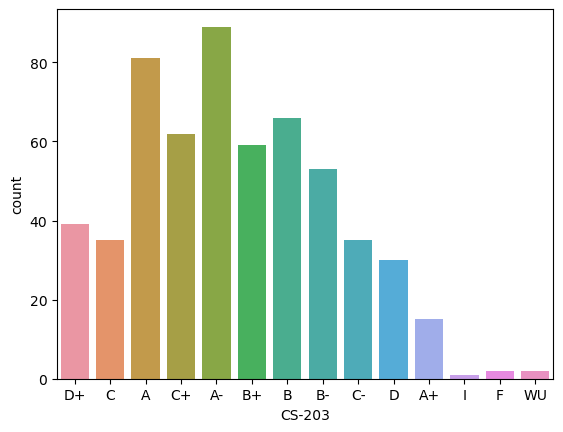

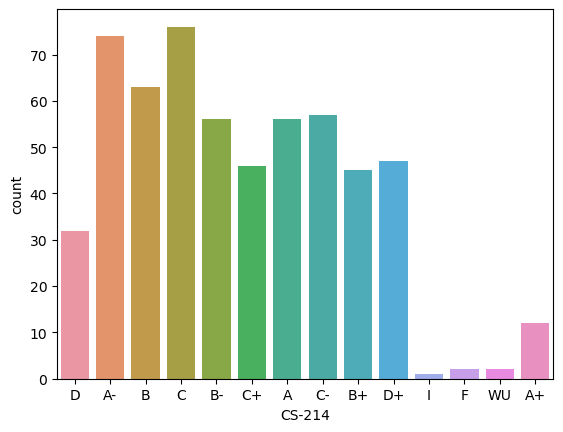

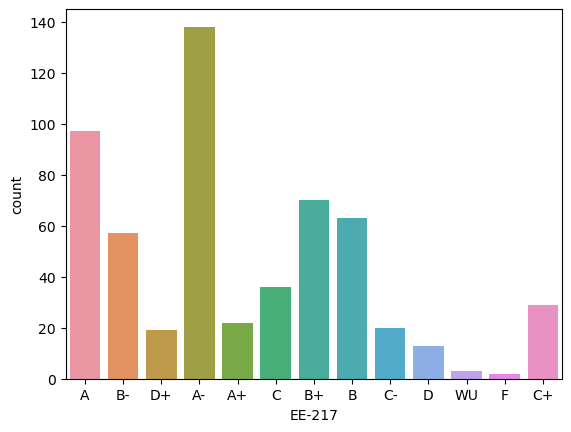

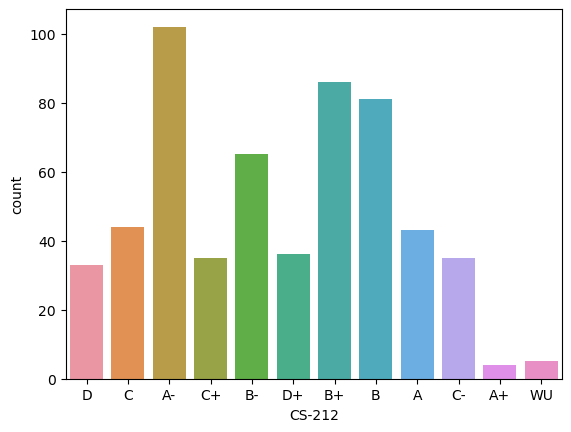

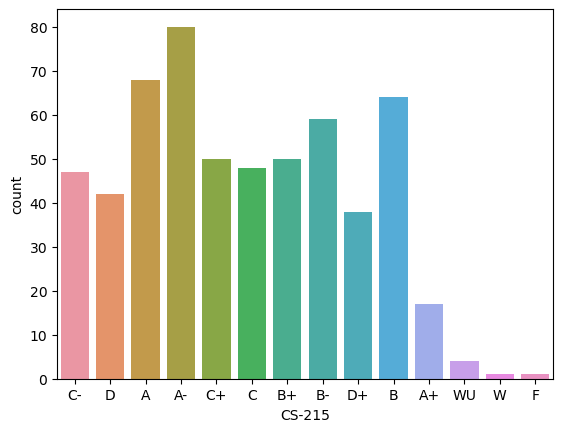

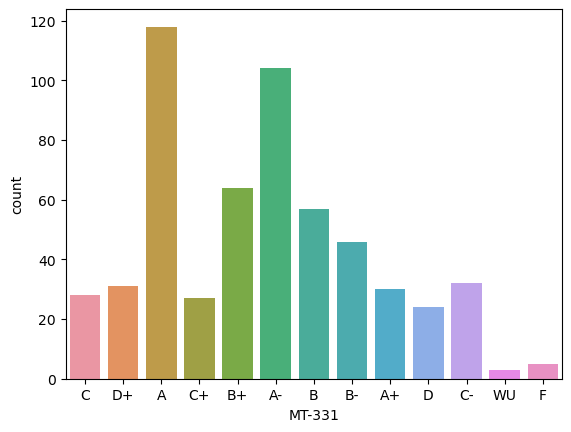

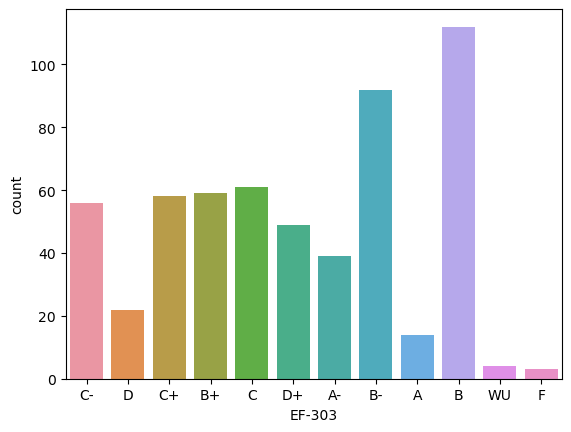

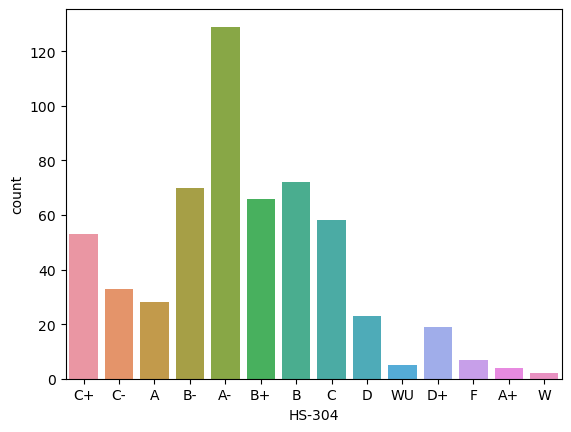

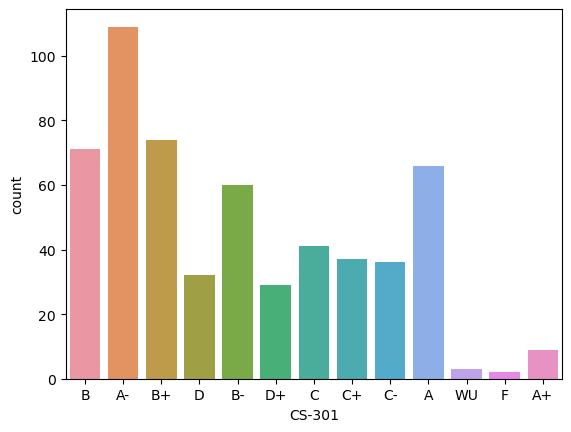

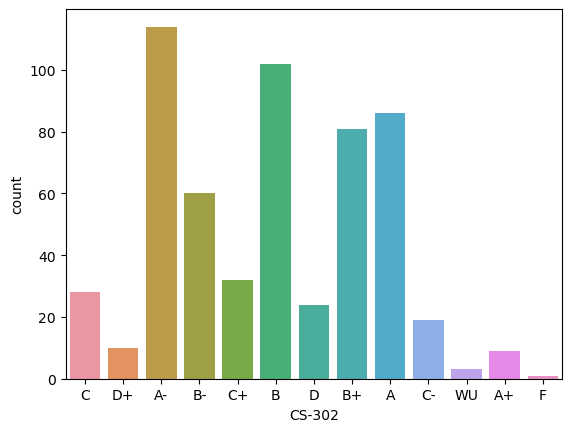

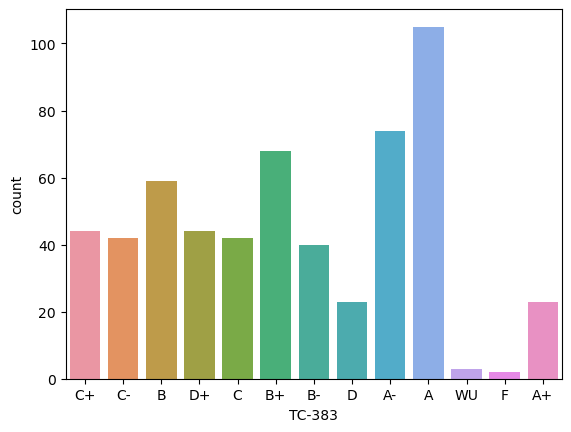

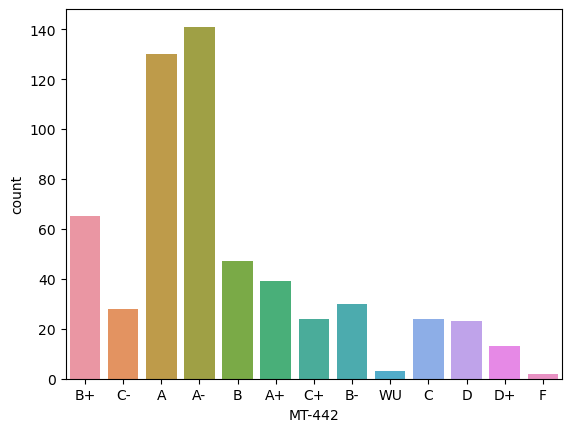

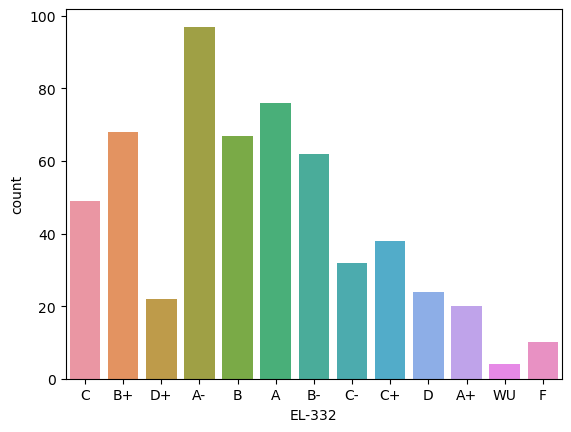

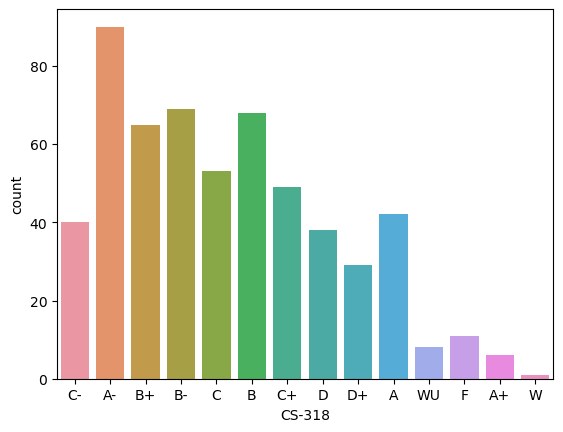

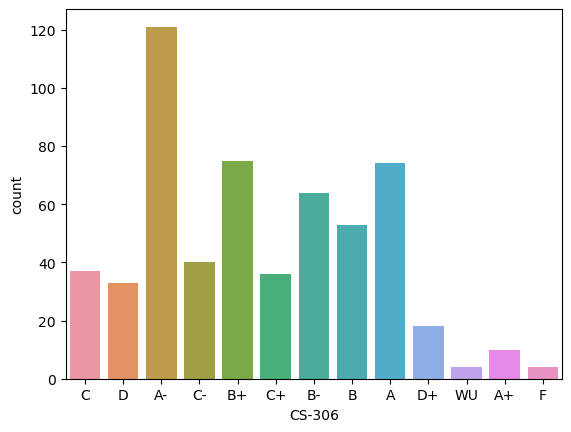

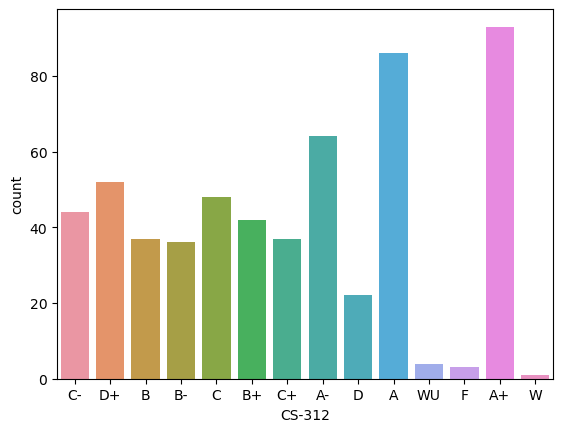

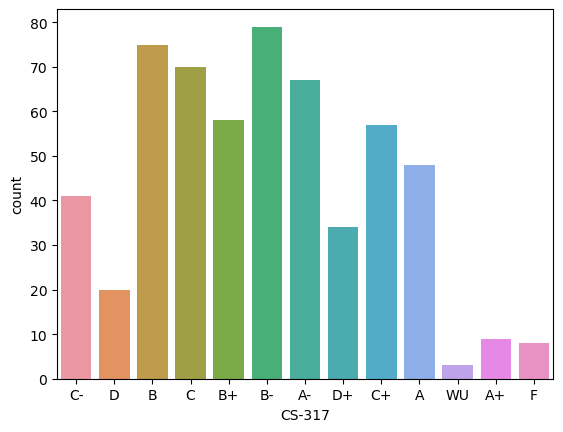

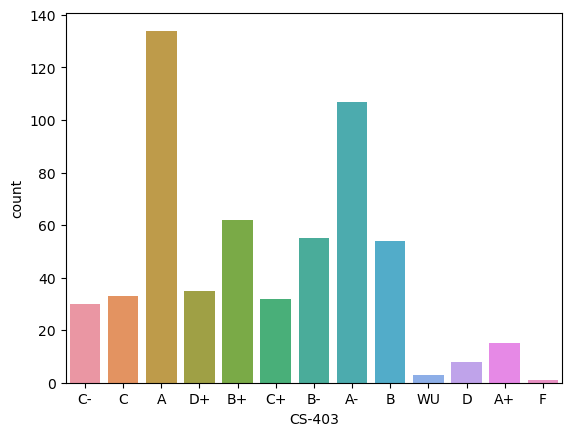

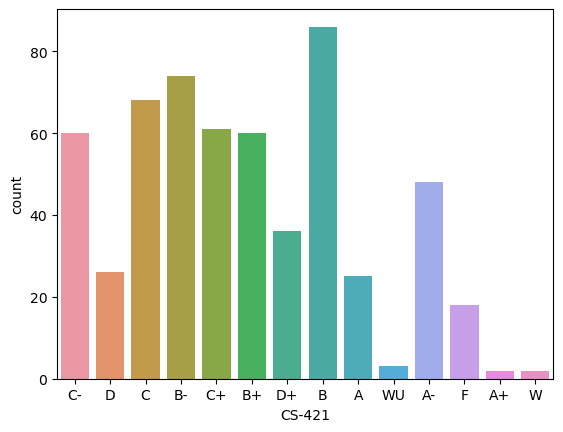

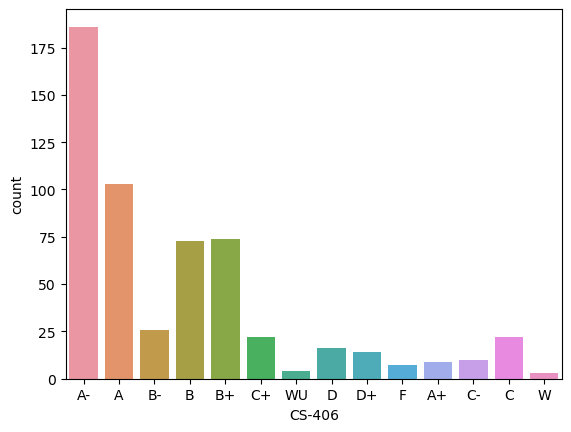

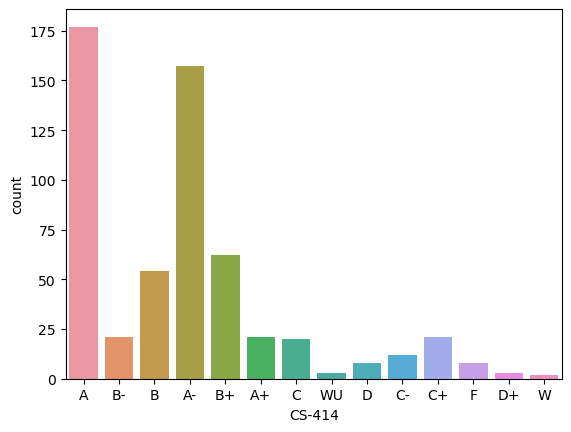

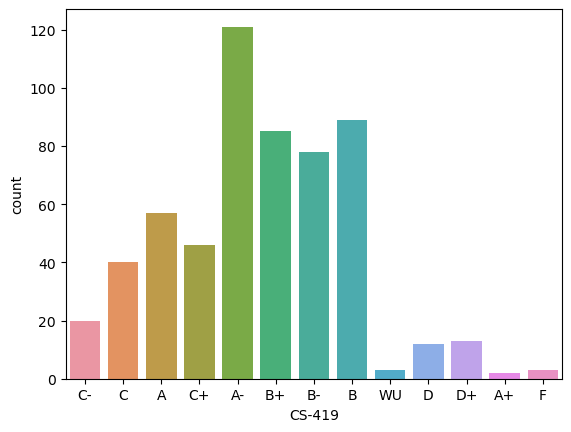

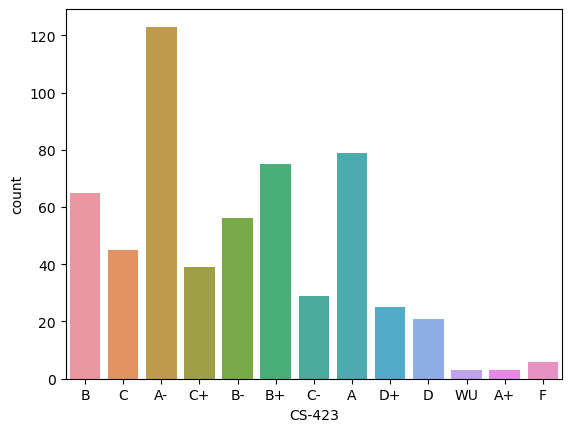

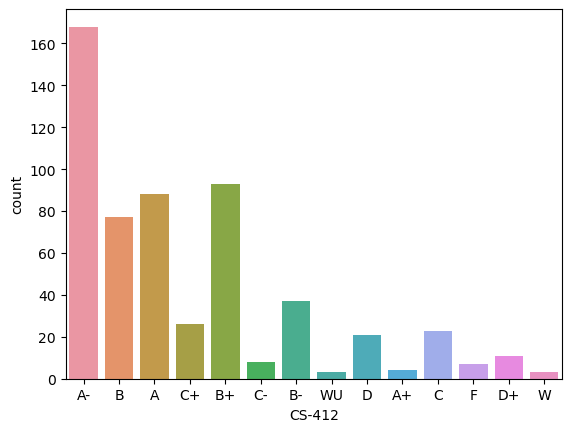

In [14]:
plt.figure(figsize=(15,10))
for col in X.columns:

        sns.countplot(x=X[col],data=X)
        plt.show()

In [15]:
for i in X.columns:    
    print(i)
    print('Number of unique data:',X[i].nunique())
    print("Value Counts")
    print(X[i].value_counts())
    print("")
    print("****************************************************************************************************")
    print("")

PH-121
Number of unique data: 12
Value Counts
A-    112
A     111
B+     61
B      57
B-     56
D      43
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
Name: PH-121, dtype: int64

****************************************************************************************************

HS-101
Number of unique data: 11
Value Counts
A-    82
B-    78
C     67
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
Name: HS-101, dtype: int64

****************************************************************************************************

CY-105
Number of unique data: 13
Value Counts
A     177
A-    120
B+     50
B      49
B-     42
A+     31
D      30
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

****************************************************************************************************

HS-105/12
Number of unique data: 13
Value Counts
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-

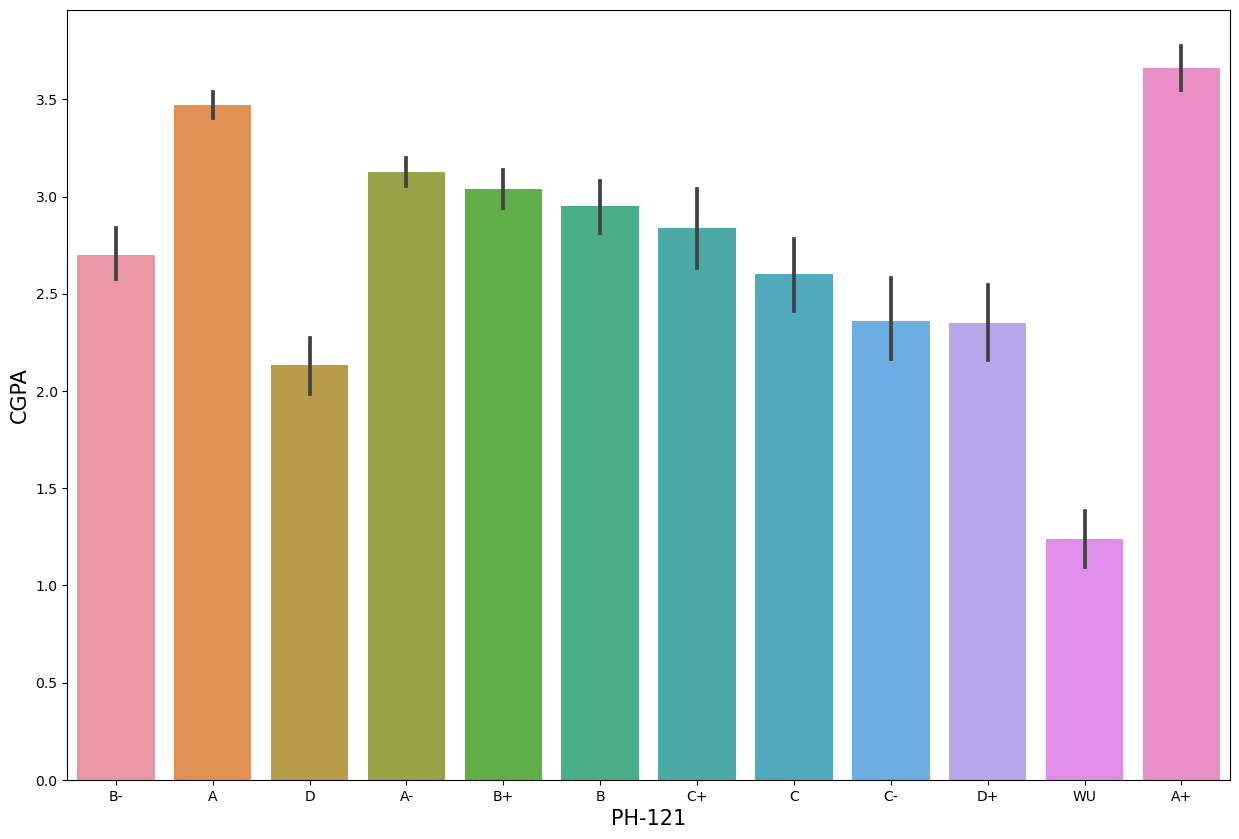

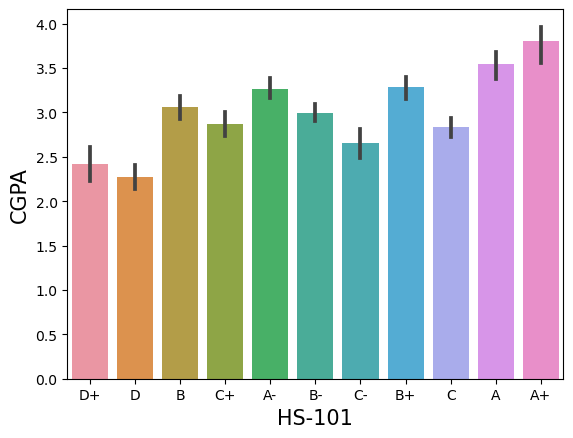

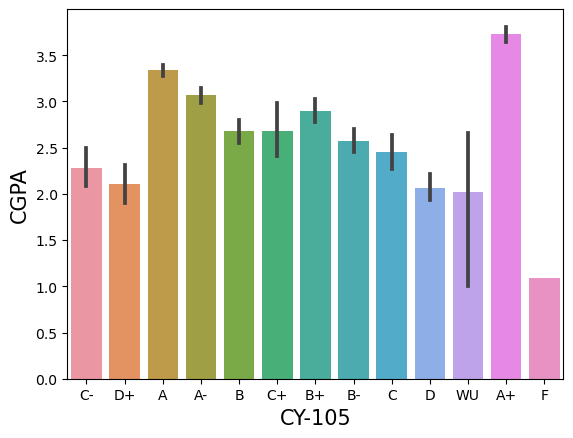

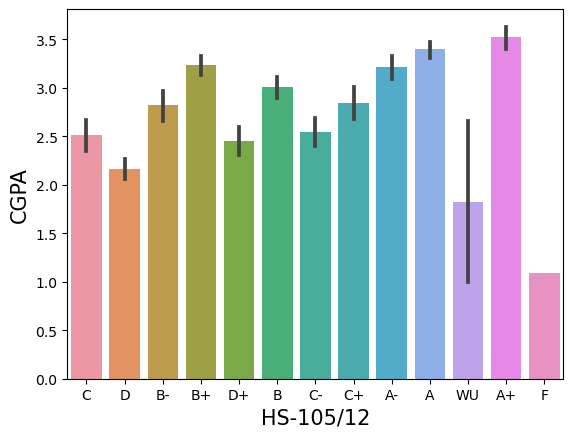

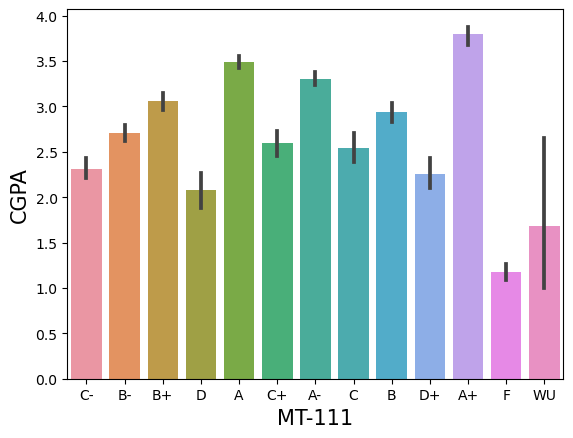

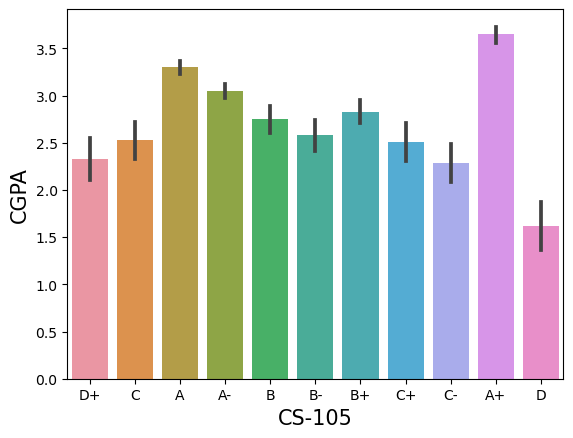

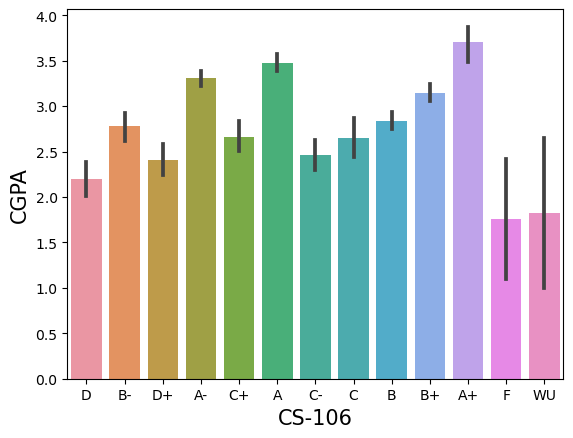

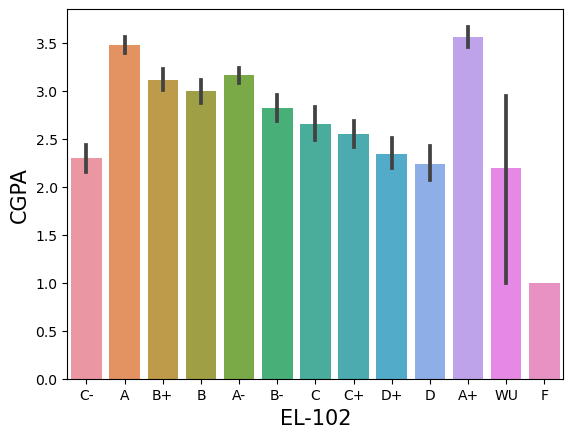

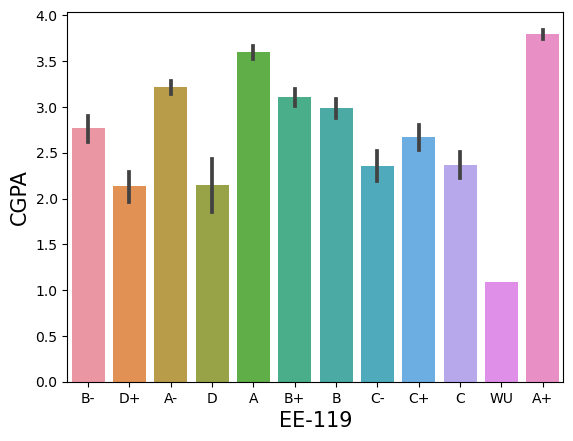

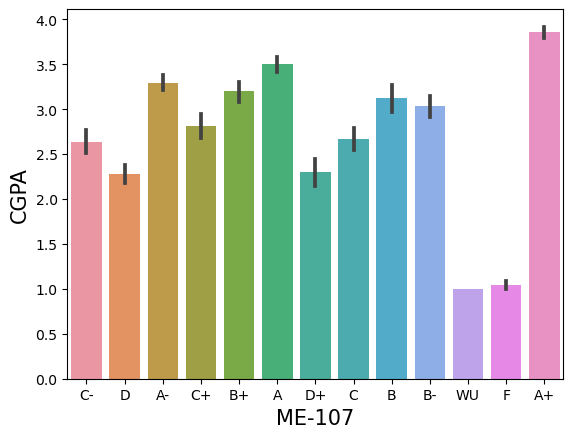

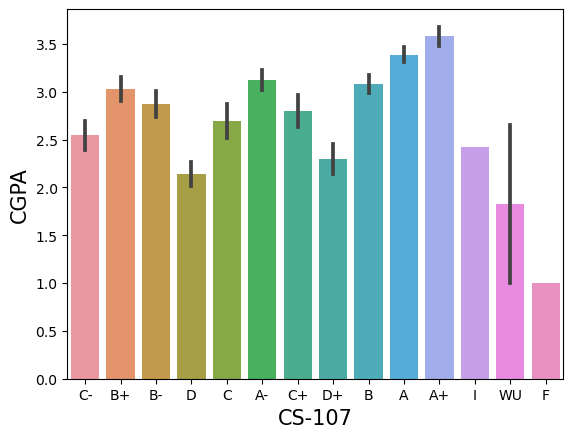

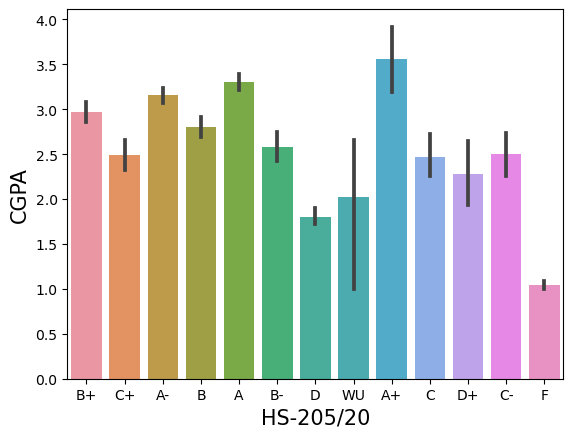

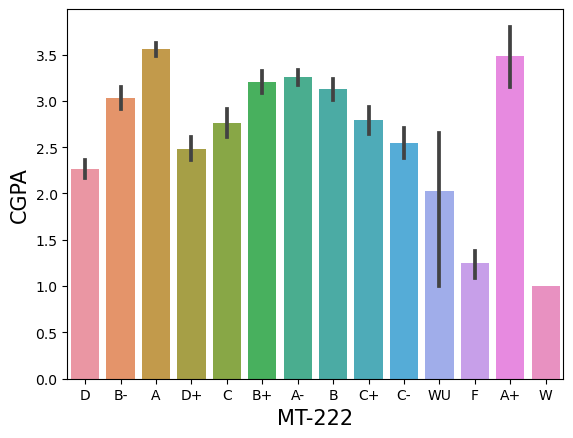

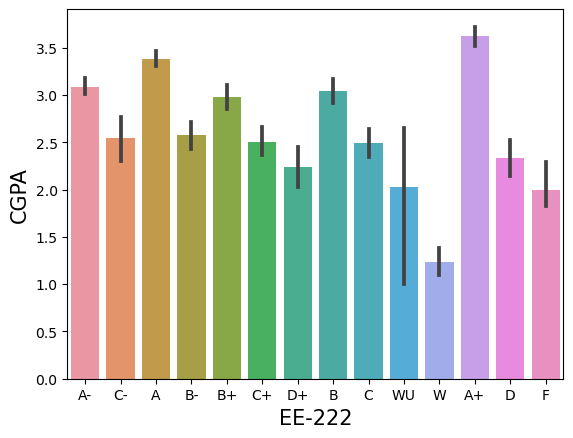

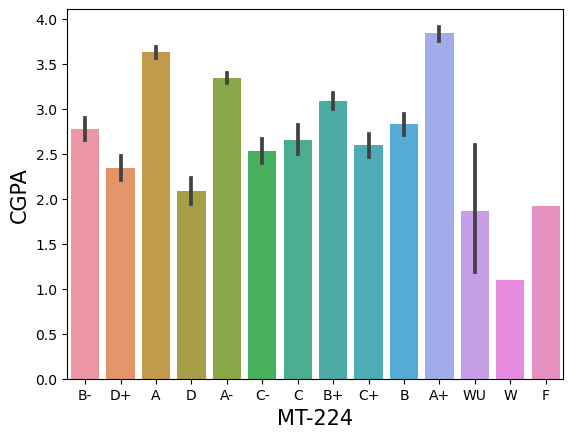

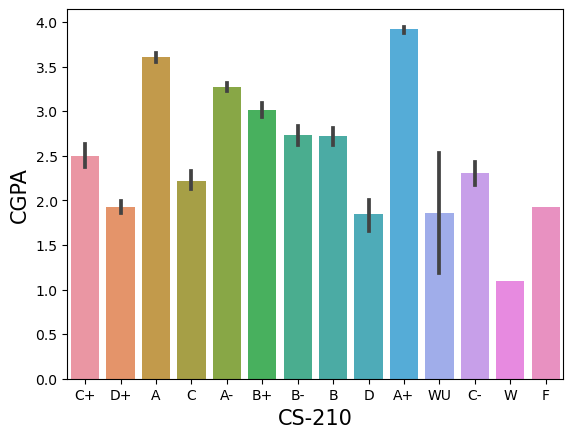

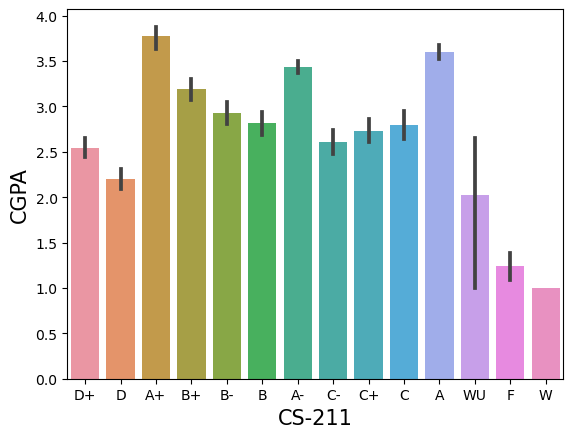

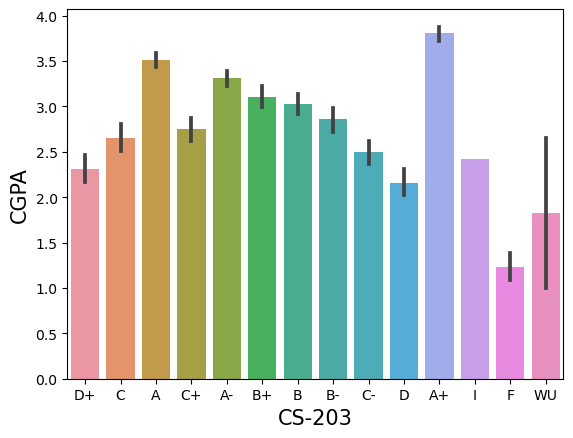

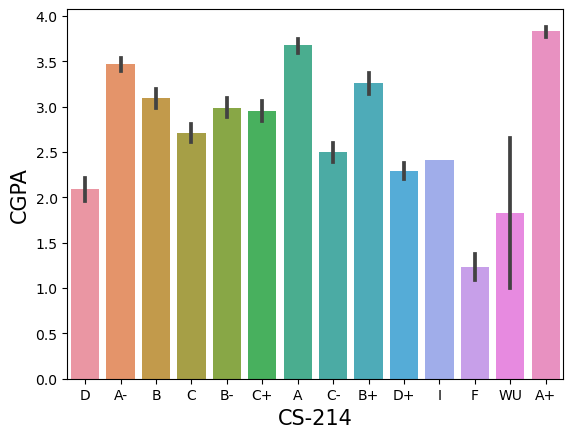

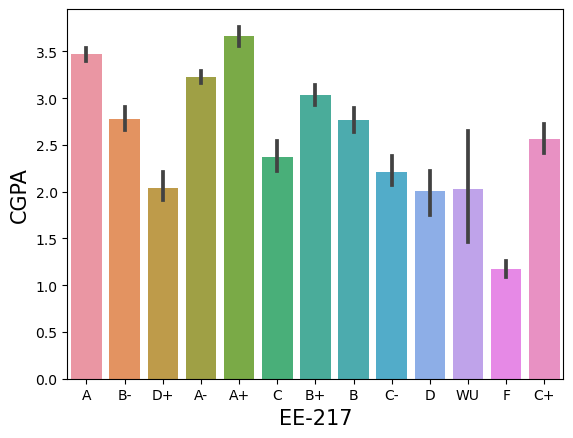

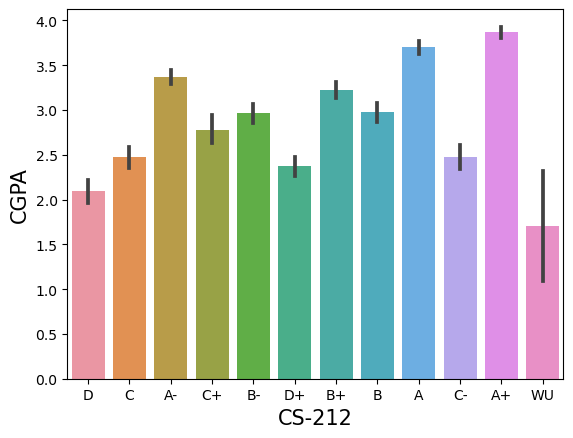

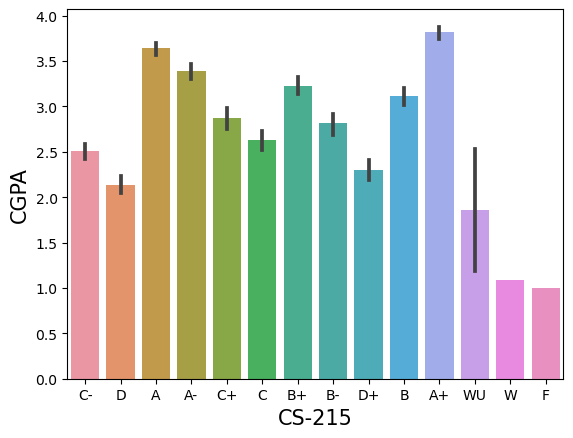

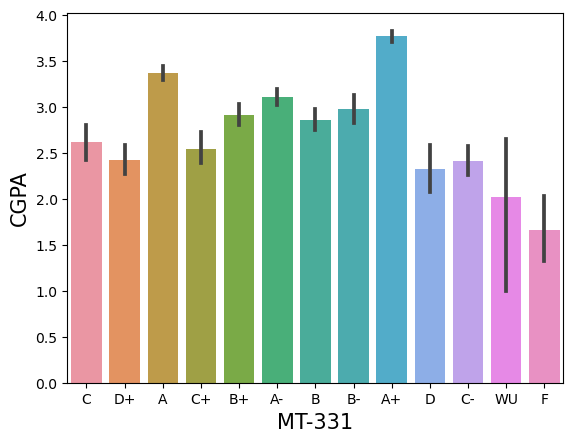

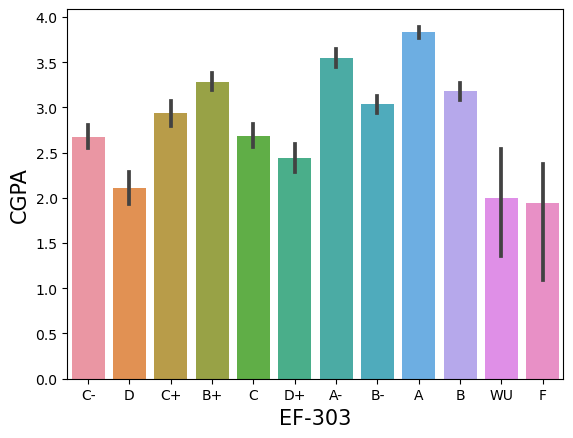

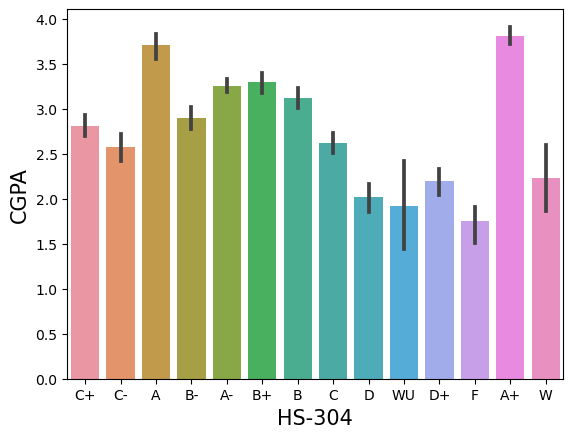

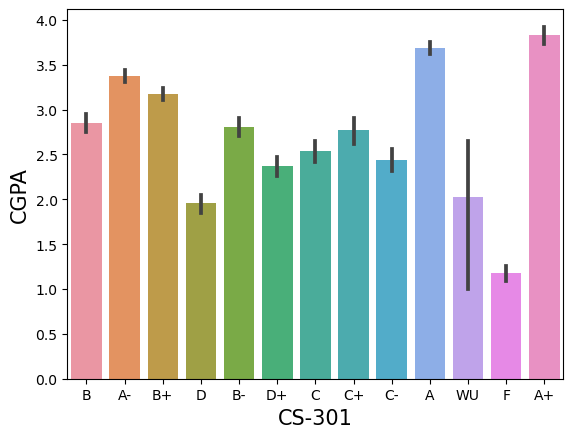

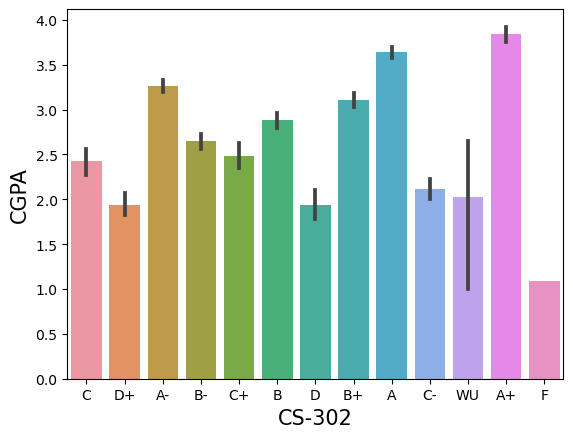

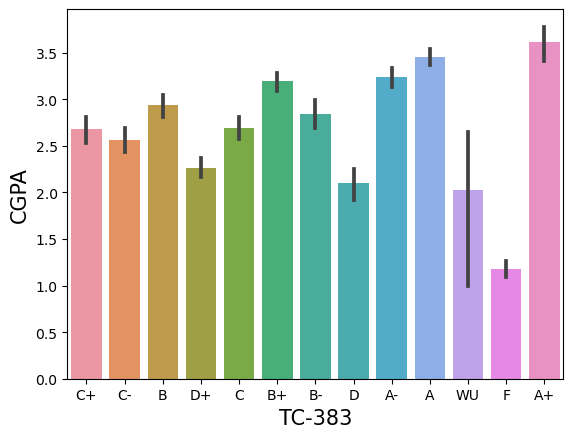

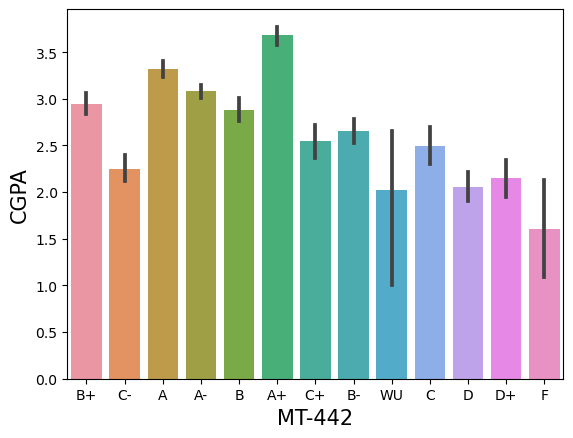

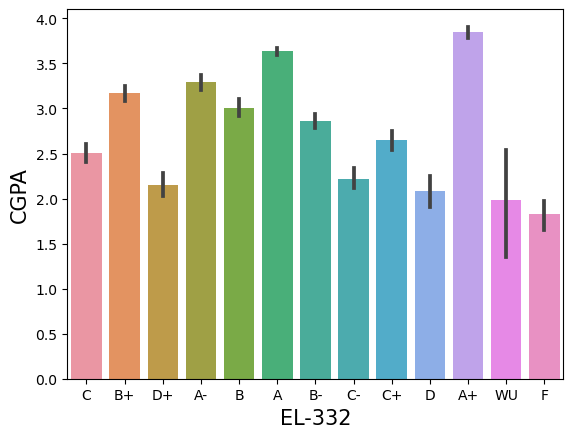

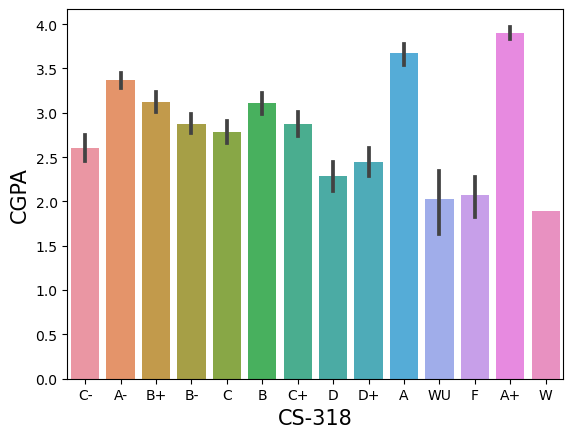

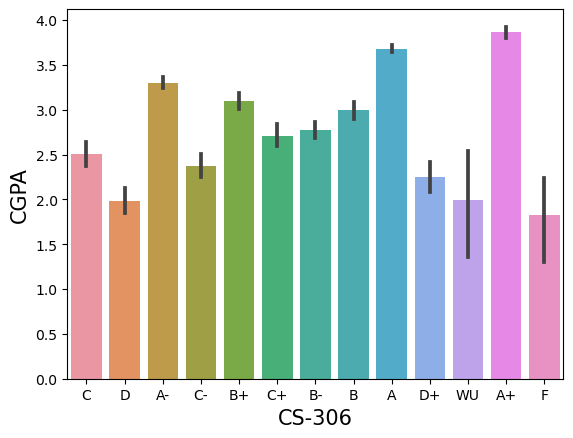

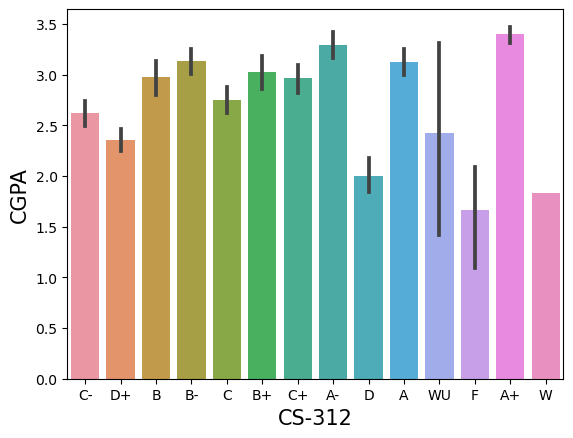

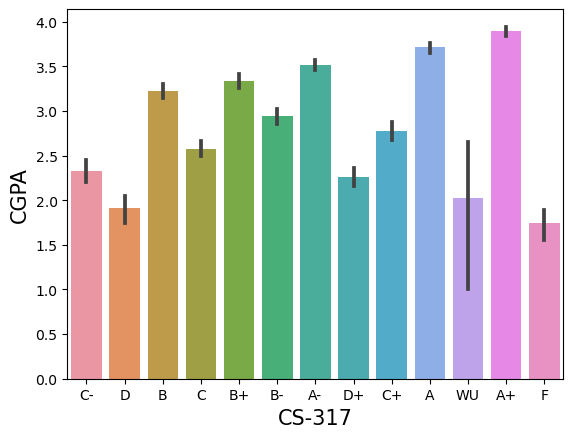

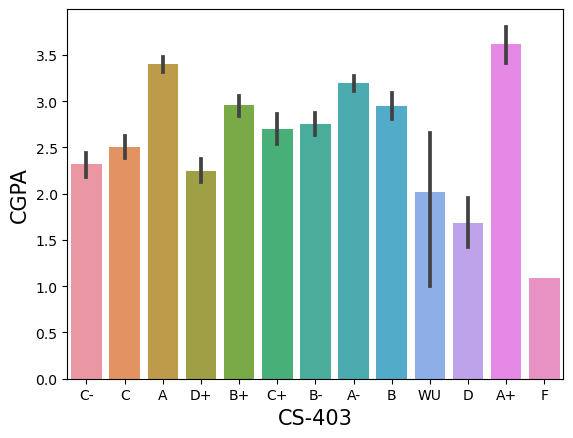

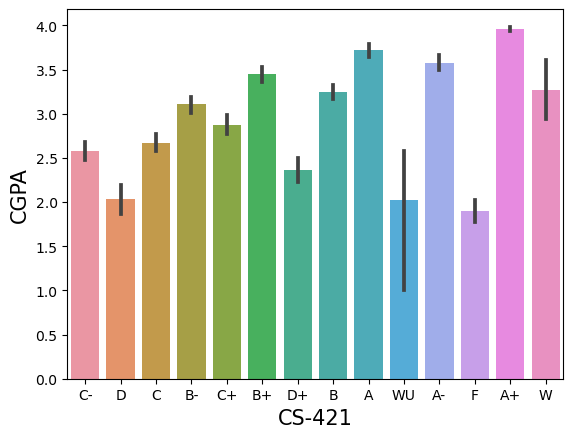

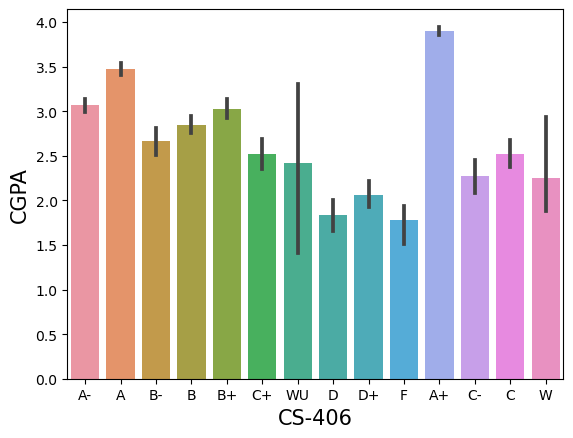

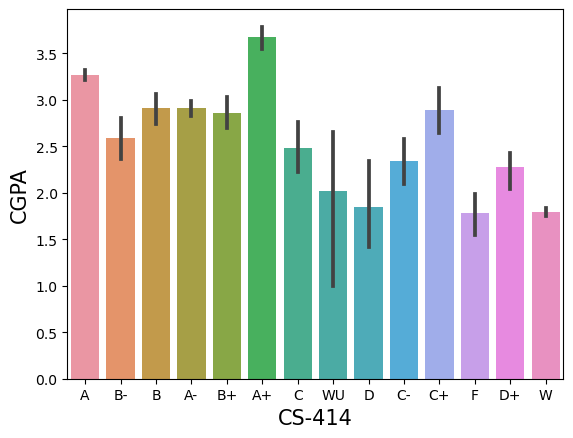

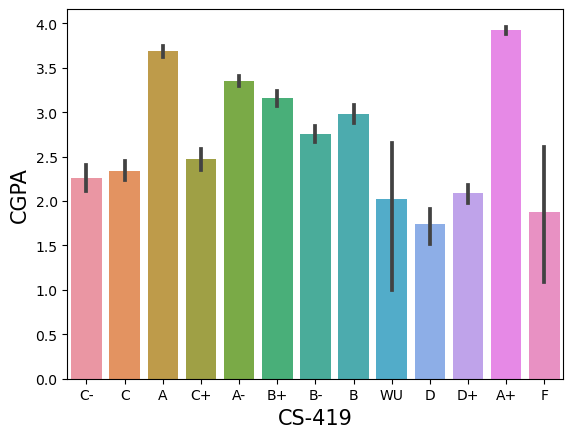

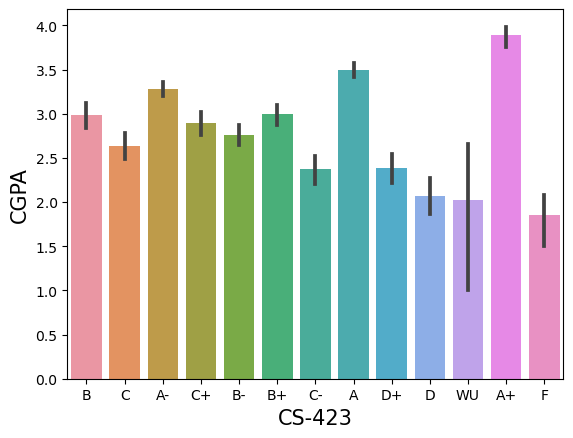

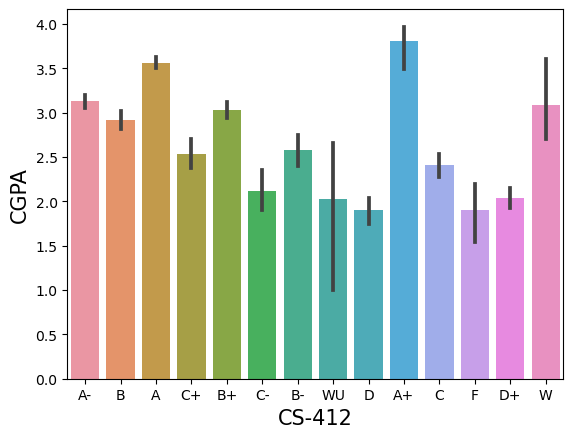

In [16]:
plt.figure(figsize=(15,10))
for col in X.columns:
    
    sns.barplot(x=X[col],y=df['CGPA'],data=df)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('CGPA',fontsize=15)
    plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
for col in X.columns:
    label = LabelEncoder()
    X[col] = label.fit_transform(X[col])

In [18]:
X.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=112)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [22]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y1=reg.predict(x_test)
r1=r2_score(y_test,y1)
print('R2 score is :',r1)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y1))
print('Mean Squared Error is :',mean_squared_error(y_test,y1))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y1)))

R2 score is : 0.9520793738147013
Mean Absolute Error is : 0.06421895097273365
Mean Squared Error is : 0.016406701316038066
Root Mean Squared Error is : 0.12808864631979708


In [23]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y2=knn.predict(x_test)
r2=r2_score(y_test,y2)

print('R2 score is :',r2)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y2))
print('Mean Squared Error is :',mean_squared_error(y_test,y2))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y2)))

R2 score is : 0.9480790674197478
Mean Absolute Error is : 0.08958321678321678
Mean Squared Error is : 0.01777629594405595
Root Mean Squared Error is : 0.13332777634107587


In [24]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
y3=tree.predict(x_test)
r3=r2_score(y_test,y3)

print('R2 score is :',r3)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y3))
print('Mean Squared Error is :',mean_squared_error(y_test,y3))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y3)))

R2 score is : 0.7863709851001306
Mean Absolute Error is : 0.20868531468531473
Mean Squared Error is : 0.07314068531468532
Root Mean Squared Error is : 0.27044534626183775


In [25]:
bag=BaggingRegressor()
bag.fit(x_train,y_train)
y4=bag.predict(x_test)
r4=r2_score(y_test,y4)

print('R2 score is :',r4)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y4))
print('Mean Squared Error is :',mean_squared_error(y_test,y4))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y4)))

R2 score is : 0.9223669899035285
Mean Absolute Error is : 0.11418951048951047
Mean Squared Error is : 0.026579402447552445
Root Mean Squared Error is : 0.16303190622559882


In [26]:
rand=RandomForestRegressor()
rand.fit(x_train,y_train)
y5=rand.predict(x_test)
r5=r2_score(y_test,y5)

print('R2 score is :',r5)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y5))
print('Mean Squared Error is :',mean_squared_error(y_test,y5))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y5)))

R2 score is : 0.9387241245673476
Mean Absolute Error is : 0.10376503496503484
Mean Squared Error is : 0.020979170476923027
Root Mean Squared Error is : 0.1448418809492718


In [27]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y6=ada.predict(x_test)
r6=r2_score(y_test,y6)

print('R2 score is :',r6)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y6))
print('Mean Squared Error is :',mean_squared_error(y_test,y6))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y6)))

R2 score is : 0.9057810628858448
Mean Absolute Error is : 0.15278602916301273
Mean Squared Error is : 0.032257966612730775
Root Mean Squared Error is : 0.1796050294750422


In [28]:
grad=GradientBoostingRegressor()
grad.fit(x_train,y_train)
y7=grad.predict(x_test)
r7=r2_score(y_test,y7)

print('R2 score is :',r7)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y7))
print('Mean Squared Error is :',mean_squared_error(y_test,y7))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y7)))

R2 score is : 0.9652767105175311
Mean Absolute Error is : 0.08252288449735132
Mean Squared Error is : 0.011888297057018988
Root Mean Squared Error is : 0.10903346760063622


In [29]:
svr=SVR()
svr.fit(x_train,y_train)
y8=svr.predict(x_test)
r8=r2_score(y_test,y8)

print('R2 score is :',r8)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y8))
print('Mean Squared Error is :',mean_squared_error(y_test,y8))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y8)))

R2 score is : 0.9808878526570666
Mean Absolute Error is : 0.06377009863985268
Mean Squared Error is : 0.006543472360964601
Root Mean Squared Error is : 0.0808917323399901


In [30]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y9=xgb.predict(x_test)
r9=r2_score(y_test,y9)

print('R2 score is :',r9)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y9))
print('Mean Squared Error is :',mean_squared_error(y_test,y9))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y9)))

R2 score is : 0.927075468183545
Mean Absolute Error is : 0.12104023307186738
Mean Squared Error is : 0.024967349289178185
Root Mean Squared Error is : 0.15801059866090686


In [31]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y10=lasso.predict(x_test)
r10=r2_score(y_test,y10)

print('R2 score is :',r10)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y10))
print('Mean Squared Error is :',mean_squared_error(y_test,y10))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y10)))

R2 score is : 0.45305667139105876
Mean Absolute Error is : 0.35441378402709195
Mean Squared Error is : 0.18725831742239404
Root Mean Squared Error is : 0.4327335409029372


In [32]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y11=ridge.predict(x_test)
r11=r2_score(y_test,y11)

print('R2 score is :',r11)
print('Mean Absolute Error is :',mean_absolute_error(y_test,y11))
print('Mean Squared Error is :',mean_squared_error(y_test,y11))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y11)))


R2 score is : 0.9520800302686958
Mean Absolute Error is : 0.0641939357447324
Mean Squared Error is : 0.01640647656428766
Root Mean Squared Error is : 0.12808776898786106


In [33]:
performance=pd.DataFrame({"Models": ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','BaggingRegressor','RandomForestRegressor',
                                           'AdaBoostRegressor','GradientBoostingRegressor','SVR','XGBRegressor','Lasso','Ridge'],
                          "r2 value":[r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11]})
performance

,Models,r2 value
0,LinearRegression,0.952079
1,KNeighborsRegressor,0.948079
2,DecisionTreeRegressor,0.786371
3,BaggingRegressor,0.922367
4,RandomForestRegressor,0.938724
5,AdaBoostRegressor,0.905781
6,GradientBoostingRegressor,0.965277
7,SVR,0.980888
8,XGBRegressor,0.927075
9,Lasso,0.453057


In [36]:
import plotly.express as px
fig=px.bar(performance, x=performance['Models'], y=performance['r2 value'])
fig.update_layout(
    template="plotly_white")
fig

In [37]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(reg,X,y)
print(score1)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y1)-score1.mean())*100)

[0.95240686 0.9044273  0.96739347 0.96749304 0.96282722]
Difference of r2_score and cross vald score is : 0.11697961827493719


In [38]:
score2=cross_val_score(knn,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y2)-score2.mean())*100)

Difference of r2_score and cross vald score is : 0.3991374102042977


In [39]:
score3=cross_val_score(tree,X,y)
print(score3)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y3)-score3.mean())*100)

[0.86755312 0.76227526 0.87248168 0.77685941 0.73447768]
Difference of r2_score and cross vald score is : -1.6358445135020494


In [40]:
score4=cross_val_score(bag,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y4)-score4.mean())*100)

Difference of r2_score and cross vald score is : -0.002060341266252319


In [41]:
score5=cross_val_score(rand,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y5)-score5.mean())*100)

Difference of r2_score and cross vald score is : -0.2629787344757384


In [42]:
score6=cross_val_score(ada,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y6)-score6.mean())*100)

Difference of r2_score and cross vald score is : -0.34233332509857606


In [43]:
score7=cross_val_score(grad,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y7)-score7.mean())*100)

Difference of r2_score and cross vald score is : 0.45886825473473447


In [44]:
score8=cross_val_score(svr,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y8)-score8.mean())*100)

Difference of r2_score and cross vald score is : 1.7858839198023002


In [45]:
score9=cross_val_score(xgb,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y9)-score9.mean())*100)

Difference of r2_score and cross vald score is : -0.3203972978717551


In [46]:
score10=cross_val_score(lasso,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y10)-score10.mean())*100)

Difference of r2_score and cross vald score is : 4.835110695258749


In [47]:
score11=cross_val_score(ridge,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y11)-score11.mean())*100)

Difference of r2_score and cross vald score is : 0.11598671667842897


In [48]:
from sklearn.model_selection import GridSearchCV
param={
       'C':[1,5,10,15,20],
      'epsilon':[0.2,0.5,0.6,1.0,1.2,1.5],
       'gamma':[0.001,0.1,0.2,0.002,0.02]
      }
gridsearch=GridSearchCV(estimator=svr,param_grid=param,cv=5)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 1, 'epsilon': 0.2, 'gamma': 0.001}

In [49]:
best=gridsearch.best_estimator_
best.fit(x_train,y_train)
y12=best.predict(x_test)
print('R2 score is :',r2_score(y_test,y12))
print('Mean Absolute Error is :',mean_absolute_error(y_test,y12))
print('Mean Squared Error is :',mean_squared_error(y_test,y12))
print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,y12)))

R2 score is : 0.9731356322932254
Mean Absolute Error is : 0.06810446066174575
Mean Squared Error is : 0.009197618898070378
Root Mean Squared Error is : 0.09590421731118177


In [50]:
score12=cross_val_score(best,X,y)
print('Difference of r2_score and cross vald score is :',(r2_score(y_test,y12)-score12.mean())*100)

Difference of r2_score and cross vald score is : 1.1783961806311583


In [51]:
x_values = np.arange(len(y_test))

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_values, y=y_test, mode='lines', name='Original Values', line=dict(color='black')))

fig.add_trace(go.Scatter(x=x_values, y=y12, mode='lines', name='Predicted Values', line=dict(color='red')))

fig.update_layout(
    title='Comparison of Predicted and Original Values',
    xaxis_title='Index',
    yaxis_title='Value',
    legend=dict(x=0.7, y=0.9),
    width=900,
    height=600
)
fig.show()